<a href="https://colab.research.google.com/github/Kennedy87670/Introduction-to-ML-DP/blob/main/02_neural_network_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network with Tensor flow

In this notebook we are going to learn how to write neural network for classification problems

A classification is where you try to classify something as one thing or another 

A few types of classification problems:

* Binary classification
* Mutliclass classification
* Multilabel classification

Creating data to view and fit 

In [2]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# Create cirlces
x, y = make_circles(n_samples, 
                    noise = 0.03,
                    random_state=42)

In [3]:
# Check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

# Our data is a little hard to understand right now... lets visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({'x0':x[:, 0], 'x1': x[:, 1], 'label':y})
circles


,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


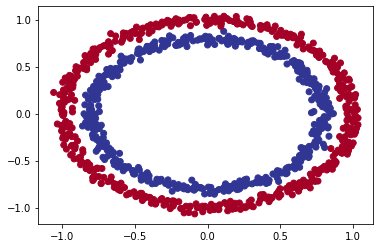

In [6]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

# Input and output shape

In [7]:
# check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [8]:
# how many samples we are working 
len(x), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#3 steps in modelling

## steps in modelling

1. Create or import a modelling
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [10]:
import tensorflow as tf


In [11]:
x =tf.cast(x, dtype=tf.float32)
y= tf.cast(y, dtype=tf.float32)
x.dtype, y.dtype

(tf.float32, tf.float32)

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(x, y, epochs=5)

# model_1.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Lets try and improve our model by training for longer
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuracy... its performing as if its guessing.

 so lets step things upnotch and add an extra layer.

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(x, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/

In [14]:
# evaluate the model
model_2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Improving our model

lets look into our bag of tricks to see how we can improve our model

1. Create or import a  -  we might add more layers or increase the number of hidden units within a layer.

2. Compile the model- here we might choose a different optimization function such as Adam instead of SGD.
3. Fit the model - perhaps we might fit our mdels with more epochs
4. Evaluate the model
change the optimization function
5. Tweak
change the learning rate

6. Evaluate

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API with 3 layers
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=0)


In [16]:
# evaluate the model
model_3.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

from numpy.lib.function_base import meshgrid
# To visualize our models prediction lets create a function 'plot_decision_boundary()'
this function

* Take in a trained model, features (x) and label (y)
* create a meshgrid of the different x values
* make predictions across the meshgrid
* Plot the predicitions as well as a line between zones(where each unqiue class falls)

In [17]:
import numpy as np

In [18]:

def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, x, y)

AttributeError: ignored

oh wait ..... we compiled our modl for a binary classification problem.

but.. we are working on regression problem, lets change the model to suit our data

In [20]:
# lets see if our model to see if its a regression model

tf.random.set_global_generator(42)

# Create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# split our regression data intotraining and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]



In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API with 3 layers
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

#fit the model to regression data
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

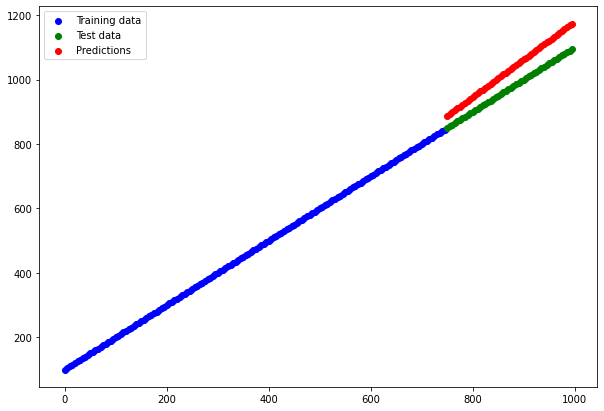

In [22]:
# make predictions with our trained model
y_reg_preds = model_3.predict(x_reg_test)

#Plot the model's predictions against regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label= 'Training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label= 'Test data')
plt.scatter(x_reg_test, y_reg_preds, c='r', label= 'Predictions')
plt.legend();

In [23]:
# the missing piece: Non linear

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API with 3 layers
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

#fit the model to regression data
#model_4.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)
history = model_4.fit(x, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

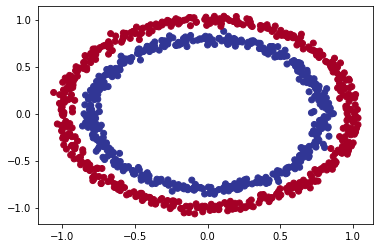

In [25]:


# Check out our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [27]:
# chek the dicison boundary for our latest model
plot_decision_boundary(model=model_4,
                       x=x,
                       y=y)

AttributeError: ignored

lets first build our model with a non-linear activation function

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API with 3 layers
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

#fit the model to regression data
#model_4.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)
history = model_5.fit(x, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

In [29]:
# Time to replicate the multi-layer neautral network for tensorflow playground

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API with 3 layers
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(4, activation='relu')
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

#fit the model to regression data
#model_4.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)
history = model_6.fit(x, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 3.2091 - accuracy: 0.0010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6774 - accuracy: 0.0050
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5260 - accuracy: 0.0100
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4545 - accuracy: 0.0220
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3271 - accuracy: 0.0420
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.9320 - accuracy: 0.0790
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.6530 - accuracy: 0.1220
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5982 - accuracy: 0.1320
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5331 - accuracy: 0.1440
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4113 - accuracy: 0.1490
Epoch 11/100
32/32 [=

In [30]:
# Evaluate the model
model_6.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.3780


[0.6642990708351135, 0.3779999911785126]

In [31]:
# whata activation function is good for binary

In [32]:
# Time to replicate the multi-layer neautral network for tensorflow playground

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API with 3 layers
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

#fit the model to regression data
#model_4.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)
history = model_7.fit(x, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [=

In [33]:
# Evaluate our model
model_7.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

from itertools import combinations
# whats wrong with the predictions we have made are we really evaluating our model correctly?
what did the model learn on and what data did we predict on?


Note: the combination of linear(straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural network

Now we have discussed the concept of linear and non-linear functions (or lines), lets see them in action

In [34]:
# create a toy a tensor (similar tothe data we pass into our models)

a = tf.cast(tf.range(-10, 10), tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

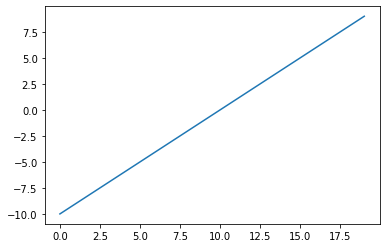

In [35]:
# Visualize our toy tensor
plt.plot(a)

In [36]:
# lets start by replicating sigmoid(x) = 1 / (1 + exp(-x)).
def sigmoid(x):
  return 1/ (1 + tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

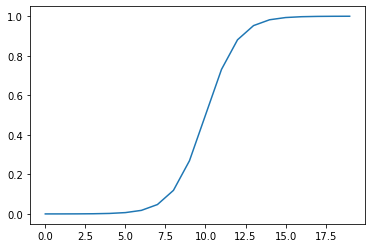

In [37]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(a))

In [38]:
# lets recreate a relu function
def relu(x):
  return tf.maximum(0, x)
# pass our toy tensor to our relu function
relu(a)

# turn all negative to zero

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

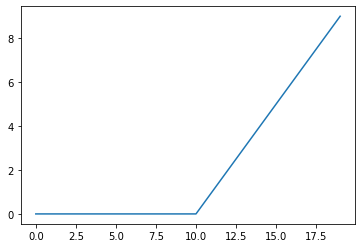

In [39]:
#plot relu-modified tensor
plt.plot(relu(a))

In [40]:
# lets try linear activation function
tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

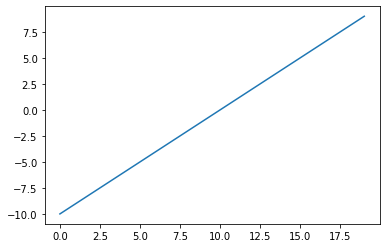

In [41]:
# does the linear activation function chnage anthing
plt.plot(tf.keras.activations.linear(a))

In [42]:
# does a even chnage?
a == tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

#evaluating and improving our classification 

so far we have been training and testing on the same data set

In [43]:
#check how many examples we have
len(x)

1000

In [44]:
#split into train and test
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

(TensorShape([800, 2]),
 TensorShape([200, 2]),
 TensorShape([800]),
 TensorShape([200]))

In [45]:
# lets create a model to fit on training data and valuate on test data
# Time to replicate the multi-layer neautral network for tensorflow playground

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API with 3 layers
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

#fit the model to regression data
#model_4.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)
history = model_8.fit(x, y, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/25
32/32 [==============================] - 0s 1ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/25
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/25
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/25
32/32 [===========

In [46]:
# evalute the model on the test dataset
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9900


[0.0963166132569313, 0.9900000095367432]

AttributeError: ignored

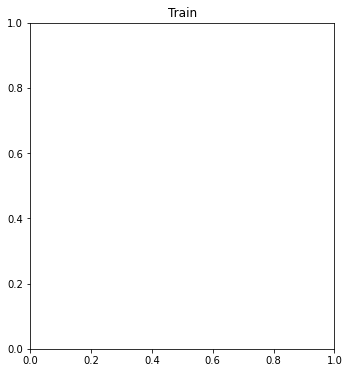

In [47]:
# plot the deision boundary for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8,x= x_train, y= y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, x = x_test, y= y_test)

In [48]:
## plot the loss (a training) curve
history.history

{'accuracy': [0.5550000071525574,
  0.5630000233650208,
  0.5600000023841858,
  0.5960000157356262,
  0.5849999785423279,
  0.6359999775886536,
  0.6890000104904175,
  0.7480000257492065,
  0.8090000152587891,
  0.8550000190734863,
  0.824999988079071,
  0.8769999742507935,
  0.9399999976158142,
  0.949999988079071,
  0.9670000076293945,
  0.9800000190734863,
  0.9779999852180481,
  0.9829999804496765,
  0.9760000109672546,
  0.9819999933242798,
  0.9829999804496765,
  0.9819999933242798,
  0.984000027179718,
  0.9819999933242798,
  0.9829999804496765],
 'loss': [0.6834276914596558,
  0.6761109232902527,
  0.6699899435043335,
  0.6615183353424072,
  0.6552616953849792,
  0.6386087536811829,
  0.6149913668632507,
  0.5641001462936401,
  0.5100768208503723,
  0.44511285424232483,
  0.4106609523296356,
  0.3722422122955322,
  0.31056877970695496,
  0.2761620879173279,
  0.24212242662906647,
  0.21157293021678925,
  0.1925615519285202,
  0.17182129621505737,
  0.15992897748947144,
  0.1419

In [49]:
# convert the history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.683428,0.555
1,0.676111,0.563
2,0.669990,0.560
3,0.661518,0.596
4,0.655262,0.585
5,0.638609,0.636
6,0.614991,0.689
7,0.564100,0.748
8,0.510077,0.809
9,0.445113,0.855


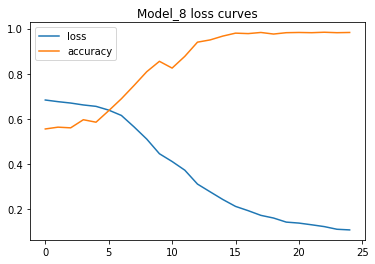

In [50]:
#plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves');

** note** for many problems the loss functions going down means the model is improving (the predictions its making are getting closer to the ground truth)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use the following steps

* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your **while** its training
* Another model ( we could use the same one as above , but we qare praticing models here)
* A modified loss curve plot.

In [51]:
## lets create a model to fit on training data and valuate on test data
# Time to replicate the multi-layer neautral network for tensorflow playground

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API with 3 layers
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# create a learning rate callback
lr_scheduler =tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler]
                        )

#fit the model to regression data
#model_4.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)
history = model_8.fit(x, y, epochs=25)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

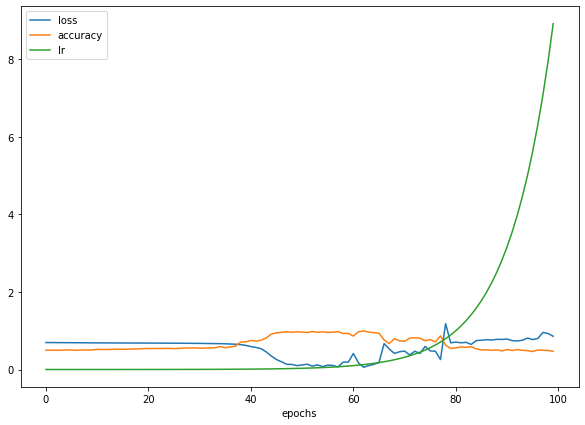

In [52]:
# checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel= 'epochs')

Text(0.5, 1.0, 'LEARNING RATE VS LOSS')

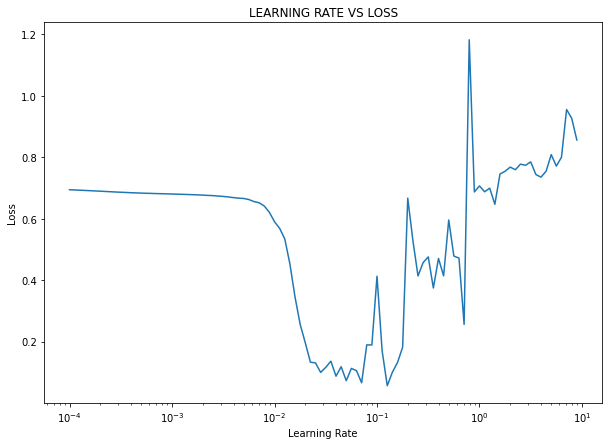

In [53]:
# plot the learning rate verus the loss
lrs = 1e-4 *(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('LEARNING RATE VS LOSS')

In [54]:
len(lrs)

100

In [55]:
#EXMAPLE OF OTHER TYPICAL LEARNING RATES VALUES
10**0, 10**-1, 10**-2,10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
# lets try using our higher ** ideal* learning rate with the same model

# lets create a model to fit on training data and valuate on test data
# Time to replicate the multi-layer neautral network for tensorflow playground

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API with 3 layers
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model with ideal learning rate 
model_10.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])

#fit the model to regression data
#model_4.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)
history = model_10.fit(x, y, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6807 - accuracy: 0.5680
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.5800
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.6120
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7930
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7850
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8910
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.9200
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9560
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9820
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.9850
Epoch 11/20
32/32 [===========

In [57]:
# evaluate model 10 on the test dataset
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 1.0000


[0.02415526658296585, 1.0]

In [58]:
#evalaute model 8 on test data
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9950


[0.03548043593764305, 0.9950000047683716]

 ## More classification methods

 alongside visualization our models results as suchas possible, there are a handful of other classification evalaution methods & metrics you should befamiliar with:
 * Accuracy
 * Precision
 * Recall
 * F1-SCORE
 * cONFUSION np.matrix
 * classification report (from scikit-learn)

In [59]:
# check the accuracy of our model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f'Model loss on the test set:{loss}')
print(f'Model accuracy on test set:{(accuracy*100):.2f} % ')

7/7 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 1.0000
Model loss on the test set:0.02415526658296585
Model accuracy on test set:100.00 % 


how about a confusion matrix

In [60]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_10.predict(x_test)

# create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [61]:
y_preds[:10]

array([[9.9912679e-01],
       [9.9998033e-01],
       [9.9778450e-01],
       [9.9971896e-01],
       [3.7538806e-01],
       [1.4950991e-02],
       [9.5867431e-01],
       [1.3813674e-02],
       [9.9998748e-01],
       [6.0075521e-04]], dtype=float32)

oops ..... looks like our predictions array has come out inprediction probability form.... the standard output from the sigmoid (or softmax) activation functions

In [62]:
# convert prediction probablities to binary format and view the first 10
tf.round(y_preds)[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [63]:
#create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

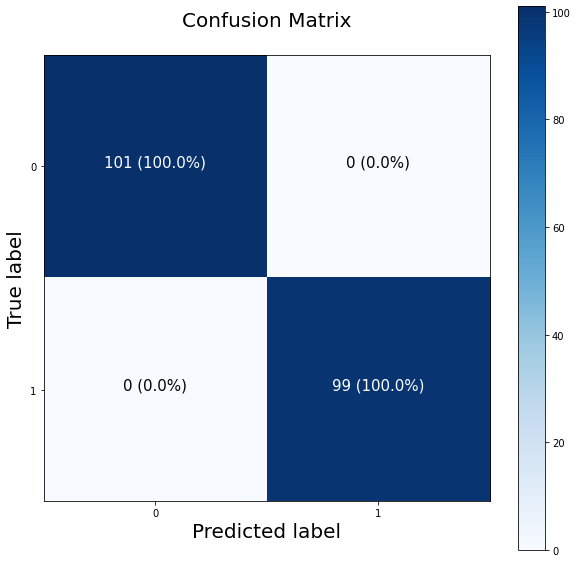

In [64]:
# how about weprettify our confusion matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## working with a larger example (multiclass classification)

when you have more than two classes as an option, its known as **multi-class classification** 

** This means if you have 3 different classes. its multi-class classification
** it also means if you have 100 diferent classes, its multiclass classification

To pratice mutli-class classification we are going to build a neaural network to classify images of different items of clothing.



In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [66]:
# the data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [69]:
# show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [71]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

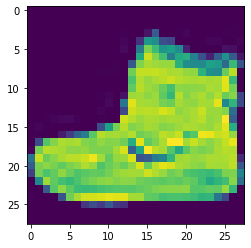

In [72]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [73]:
# check out samle label
train_labels[7]

2

In [75]:
# create a small list so we can index onto out training labels sp they are human- readable
class_name = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_name)

10

Text(0.5, 1.0, 'T-shirt/top')

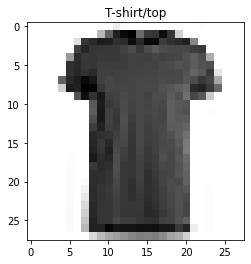

In [76]:
from matplotlib.cbook import index_of
# Plot an exmaple image and its label
index_of_choice =17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

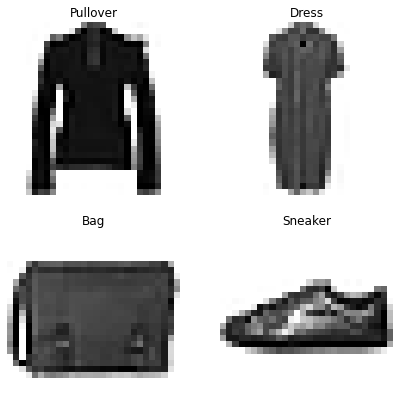

In [79]:
# plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax =plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

# building a multi-class classification model

Four multi-class classification model, we can use a similar architecture to our binary calssifiers, however, we are going to tweak a few things:
 
 * Input shape = 28 x 28 (the shape of one image)
 * Output shape = 10 (one per class for clothing)
 * loss function = tf.keras.losses.CategoricalCrossentropy()
 * if your labels are one-hot encoded, use catergoricalcross entropy()
 * if your labels are inter form use SparseCategorical
 * output layer activation = softmax(not sigmoid)
 

In [81]:
# our data needs to be fatterned (from 28 * 28 to none, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
tf.one_hot(train_labels[:10], depth=10)

In [88]:
# set random seed 
tf.random.set_seed(42)

# create the model
model_1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                               tf.keras.layers.Dense(4, activation ='relu'),
                               tf.keras.layers.Dense(4, activation ='relu'),
                               tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# compile themodel
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

non_history = model_1.fit(train_data, 
                          tf.one_hot(train_labels, depth = 10), 
                          epochs=10,
                         validation_data=(test_data,  tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [90]:
# check the model summary
model_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 3140      
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [91]:
# check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have numbers in tensors between 0 & 1

In [92]:
# we can get our training and test data between 0 & 1 by dividing by the maximum
train_data_norm = train_data/255
test_data_norm  = test_data/255

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [95]:
# Now our data is normallized 
# set random seed 
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                               tf.keras.layers.Dense(4, activation ='relu'),
                               tf.keras.layers.Dense(4, activation ='relu'),
                               tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# compile themodel
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

norm_history = model_2.fit(train_data_norm, 
                          tf.one_hot(train_labels, depth = 10), 
                          epochs=10,
                         validation_data=(test_data_norm,  tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

** Note** neautral networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

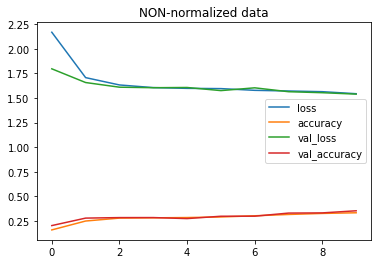

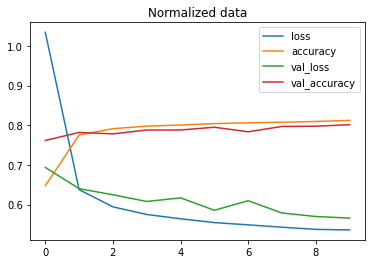

In [96]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_history.history).plot(title='NON-normalized data')
#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

**ote** WE ARE COMPARING THE SAME MODEL BUT WITH SLIGHTLY DIFFERENT DATA CAN PRODUCE *DRAMATICALLY* DIFFERENT RESULTS. SO WHEN YOU ARE COMPARING MODELS, ITS IMPORTANT TO MAKE SURE YOU ARE COMPARING THEM ON THE SAME CRITERIA (EG. SAME ARCHITECTURE BUT DIFFERENT DATA OR SAME DATA AND DIFFERENT ARCHITECTURE)

In [98]:
from gc import callbacks
#3 finding the ideal learning rate

# Now our data is normallized 
# set random seed 
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                               tf.keras.layers.Dense(4, activation ='relu'),
                               tf.keras.layers.Dense(4, activation ='relu'),
                               tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# compile themodel
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

# create the learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# fit the model
find_ir_history = model_3.fit(train_data_norm, 
                          tf.one_hot(train_labels, depth = 10), 
                          epochs=40,
                         validation_data=(test_data_norm,  tf.one_hot(test_labels, depth=10)),
                         callbacks= [lr_scheduler ] )

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Fiding Ideal learning rate')

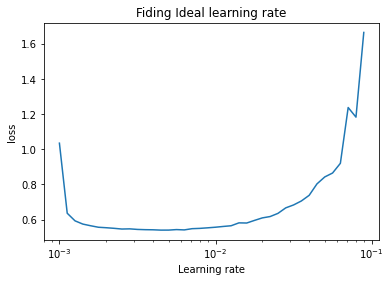

In [100]:
# plot the learning rate decay curve

lrs = 1e-3 * (10**(tf.range(40)/20 ) )
plt.semilogx(lrs, find_ir_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('loss')
plt.title('Fiding Ideal learning rate')

In [101]:
# lets refill the model with the ideal learning rate
# Now our data is normallized 
# set random seed 
tf.random.set_seed(42)

# create the model
model_14 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                               tf.keras.layers.Dense(4, activation ='relu'),
                               tf.keras.layers.Dense(4, activation ='relu'),
                               tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# compile themodel
model_14.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr =0.001),
                metrics= ['accuracy'])

history_14 = model_14.fit(train_data_norm, 
                          tf.one_hot(train_labels, depth = 10), 
                          epochs=20,
                         validation_data=(test_data_norm,  tf.one_hot(test_labels, depth=10)))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

# Evaluate our multi-class classification model

To evalauate our multi-class classification model we could:
* Evalaute its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predicitons (through visualiations)
* Improve its result bytraining it for longer or changing the archietecture)
*  save and export it to use for our application


lets go through top2

In [113]:
# create a confusion matrix

# how about weprettify our confusion matrix

import itertools

figsize = (10, 10)
def make_confusion_matrix(y_true, y_pred, classes =None, figsize = (10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Set classes to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [114]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [115]:
# make some predictions with ourmodel
y_probs = model_14.predict(test_data_norm) # probs is short for 'prediction probabilities'

# view the first 5 predictions
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

** note** Remeber to make predictions on the same kind of data your model was trained on 9eg. if your model was trained on normalized data, you will want to make predictions on normalized data

In [116]:
y_probs[0], tf.argmax(y_probs[0]), class_name[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [117]:
# convert all the probabilities into integers
y_preds = y_probs.argmax(axis=1)

#view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

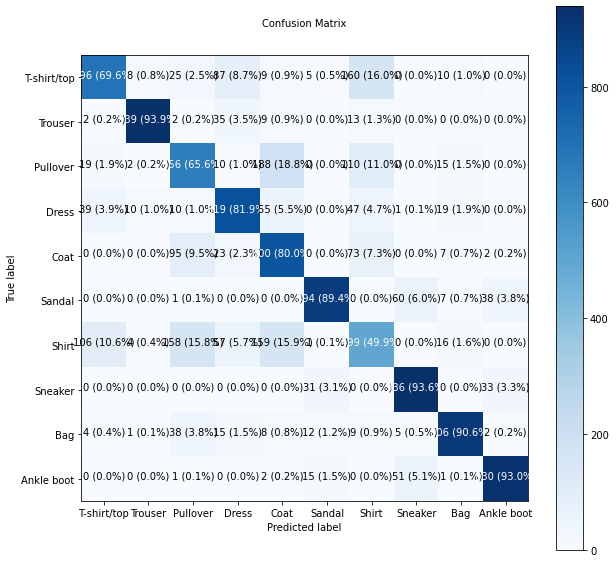

In [121]:
# make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes =class_name,
                      figsize=(10, 10),
                      text_size=10)

 ** note** often when working with images and other forms of visual data, its a good idea to visualize as much as possible to develop a further understanding of the data ajnd the inputs and outputs of your models

 how about we create a fun little function for 
 * plot a random image
 * make prediction on said image
 * label he plot with the truth label & the predicted label

In [134]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
      
  # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red

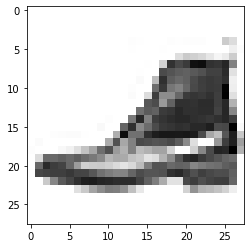

In [135]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data_norm, # always make prediction on the same kind of data your model was trained on 
                  true_labels=test_labels, 
                  classes=class_name)

What patterns is our model learning?

In [137]:
# find the layers of our most recent model
model_14.layers

In [139]:
# extract a particular layer
model_14.layers[1]

In [142]:
# get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

#shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

Now lets check bias vector

In [143]:
# Bias and biases shapes
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with weights matrix.

The bias vector get initialized as zers (at least in the case of a Tensorflow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [144]:
model_14.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f129ea05650>>

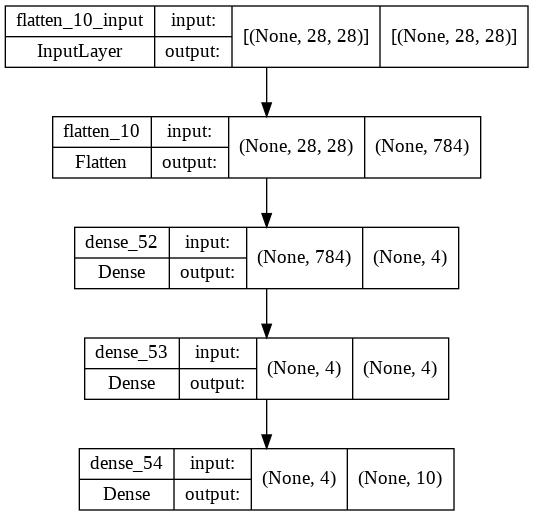

In [145]:
# lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layer
plot_model(model_14, show_shapes=True )